In [61]:
import pandas as pd
import numpy as np
import re # Regular expression library
import string
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Hotel Reservations.csv')
df = pd.DataFrame(data)
df = df.drop(columns=['Booking_ID'])
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [6]:
print("The number of columns:",df.shape[0])
print("THe number of rows:",df.shape[1])

The number of columns: 36275
THe number of rows: 18


# EDA

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [40]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [41]:
print("The number of missing value:" , df.isnull().values.sum())
print("Is there any missing value:" , df.isnull().values.any())

The number of missing value: 0
Is there any missing value: False


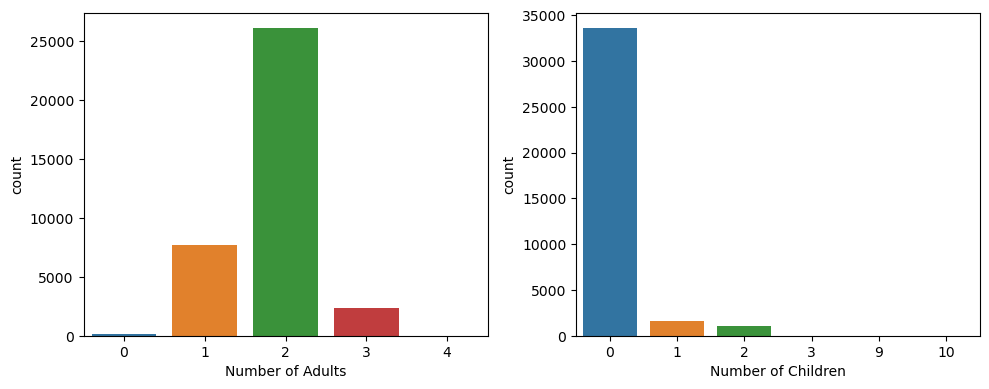

In [71]:
plt.figure(figsize = (10,15))


plt.subplot(4,2,1)
sns.countplot(data=df, x='no_of_adults' , hue='no_of_adults', palette='tab10', legend=False)
plt.xlabel('Number of Adults')

plt.subplot(4,2,2)
sns.countplot(data=df, x='no_of_children' , hue='no_of_children', palette='tab10', legend=False)
plt.xlabel('Number of Children')

plt.tight_layout()
plt.show()

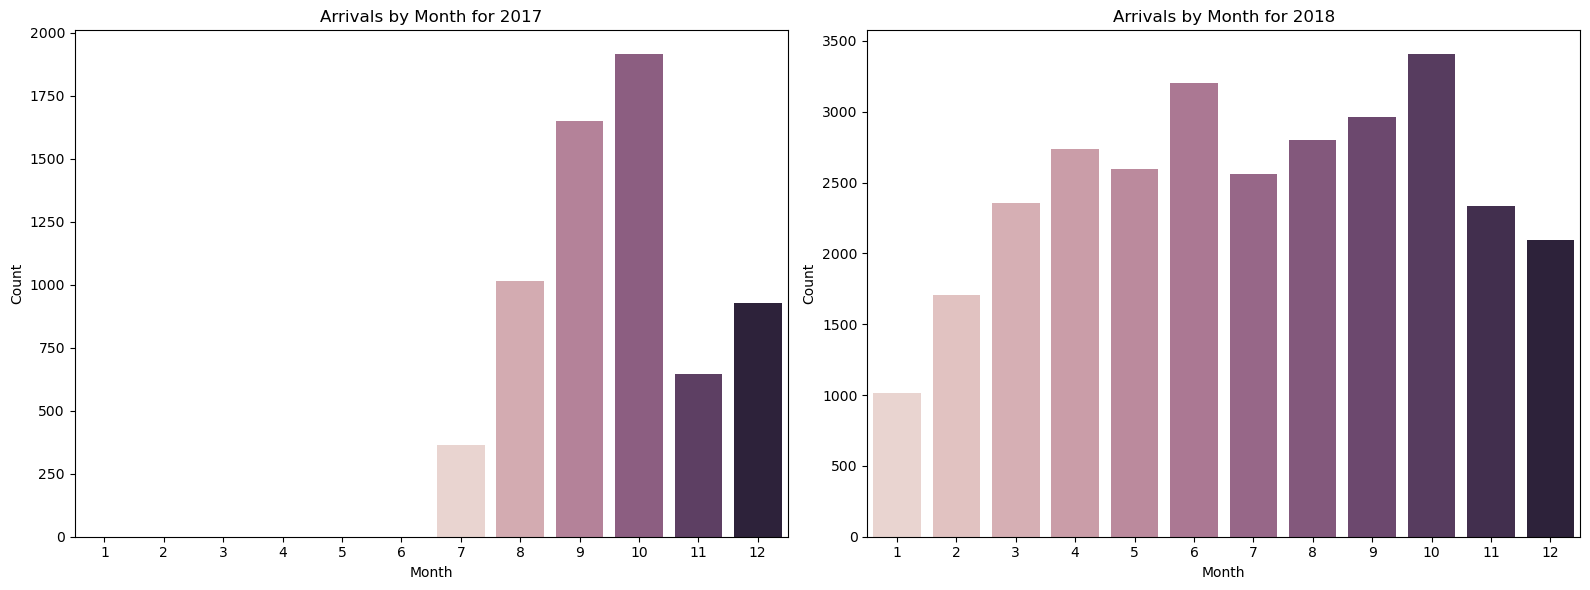

In [10]:
# Filter the DataFrame for the years 2017 and 2018
df_2017 = df[df['arrival_year'] == 2017]
df_2018 = df[df['arrival_year'] == 2018]

# Set up the plot
plt.figure(figsize=(16, 6))

month_order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

# Plot the count of arrivals by month
plt.subplot(1, 2, 1)
sns.countplot(data=df_2017, x='arrival_month', order=month_order, hue='arrival_month', legend=False)
plt.title('Arrivals by Month for 2017')
plt.xlabel('Month')
plt.ylabel('Count')

# Create subplot for 2018
plt.subplot(1, 2, 2)
sns.countplot(data=df_2018, x='arrival_month', hue = 'arrival_month', legend=False)
plt.title('Arrivals by Month for 2018')
plt.xlabel('Month')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

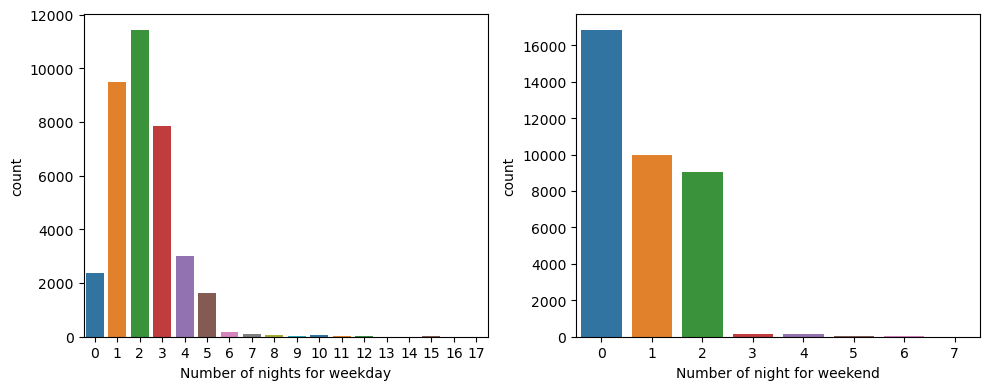

In [13]:
plt.figure(figsize = (10,15))


plt.subplot(4,2,1)
sns.countplot(data=df, x='no_of_week_nights' , hue='no_of_week_nights', palette='tab10', legend=False)
plt.xlabel('Number of nights for weekday')

plt.subplot(4,2,2)
sns.countplot(data=df, x='no_of_weekend_nights' , hue='no_of_weekend_nights', palette='tab10', legend=False)
plt.xlabel('Number of night for weekend')

plt.tight_layout()
plt.show()

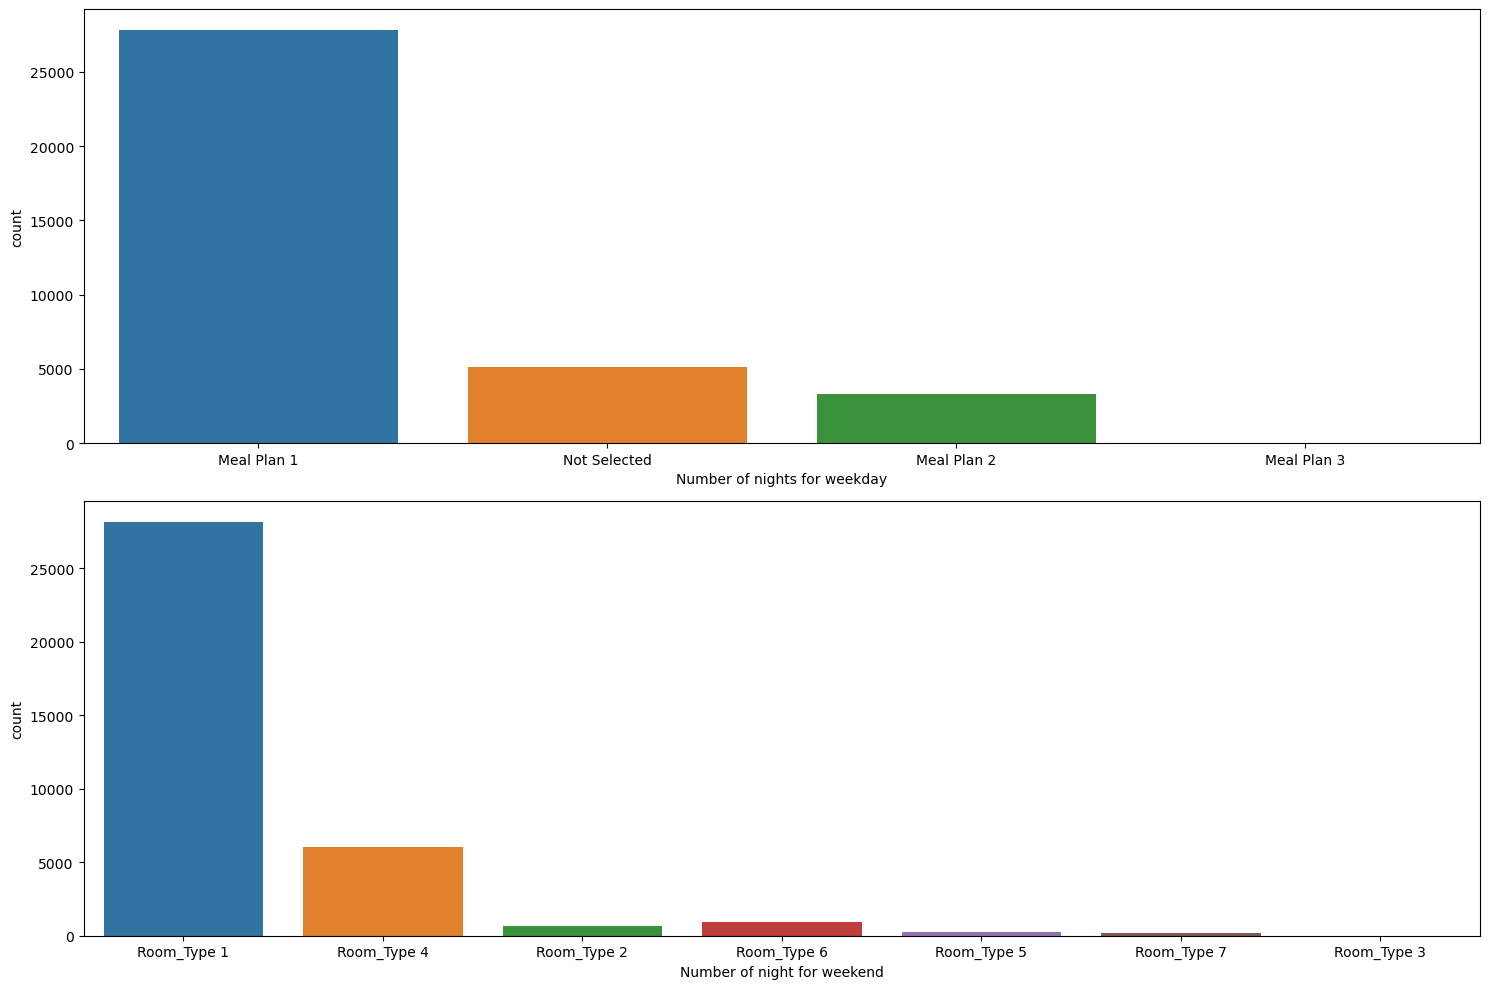

In [24]:
plt.figure(figsize = (15,10))

order_meal = ['Not Selected']

plt.subplot(2,1,1)
sns.countplot(data=df, x='type_of_meal_plan' , hue='type_of_meal_plan'  ,palette='tab10', legend=False)
plt.xlabel('Number of nights for weekday')

plt.subplot(2,1,2)
sns.countplot(data=df, x='room_type_reserved' , hue='room_type_reserved', palette='tab10', legend=False)
plt.xlabel('Number of night for weekend')

plt.tight_layout()
plt.show()

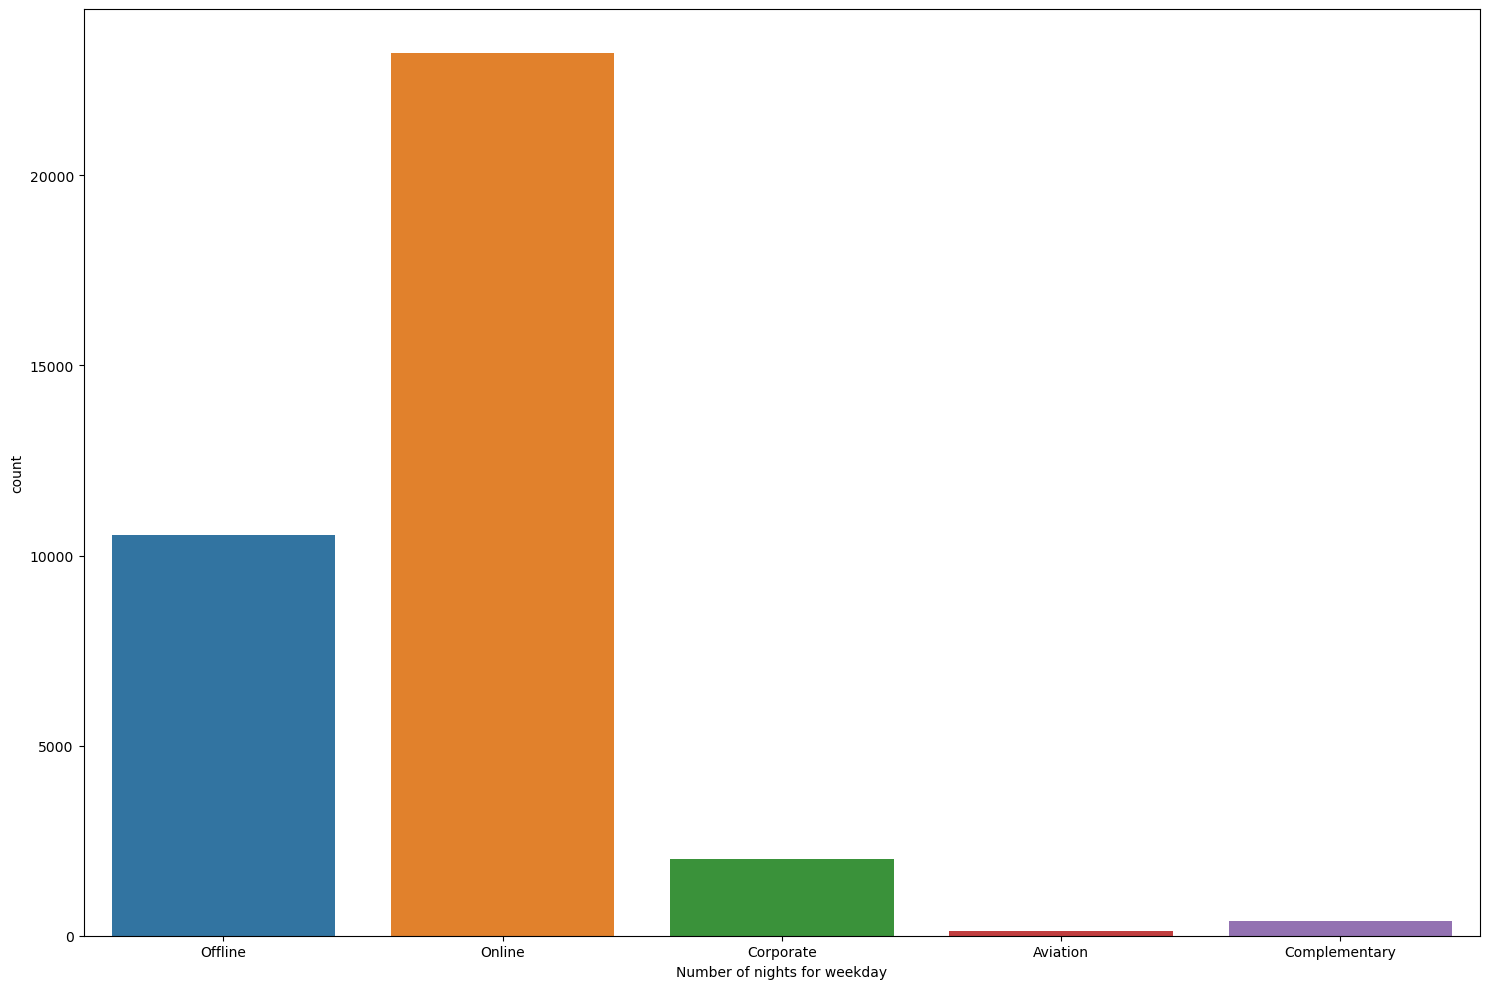

In [32]:
plt.figure(figsize = (15,10))

sns.countplot(data=df, x='market_segment_type' , hue='market_segment_type'  ,palette='tab10', legend=False)
plt.xlabel('Number of nights for weekday')

plt.tight_layout()
plt.show()

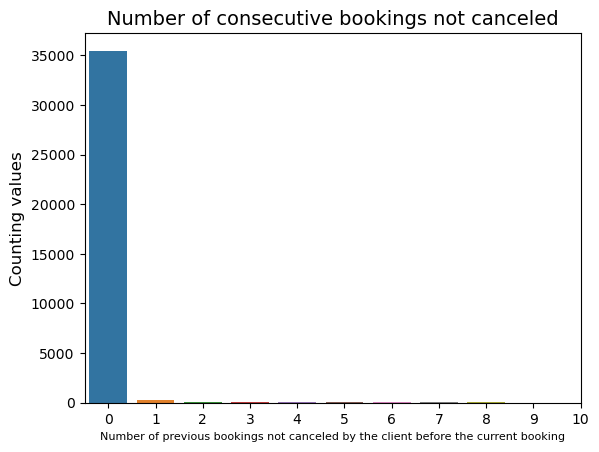

In [77]:
sns.countplot(x='no_of_previous_bookings_not_canceled', hue='no_of_previous_bookings_not_canceled', data=df, palette='tab10', legend=False)
plt.xlim(right=10) 

plt.xlabel('Number of previous bookings not canceled by the client before the current booking', fontsize=8)
plt.ylabel('Counting values', fontsize=12)
plt.title('Number of consecutive bookings not canceled', fontsize=14)

plt.show()

<Axes: title={'center': 'Boxplot avg_price_per_room'}, xlabel='avg_price_per_room'>

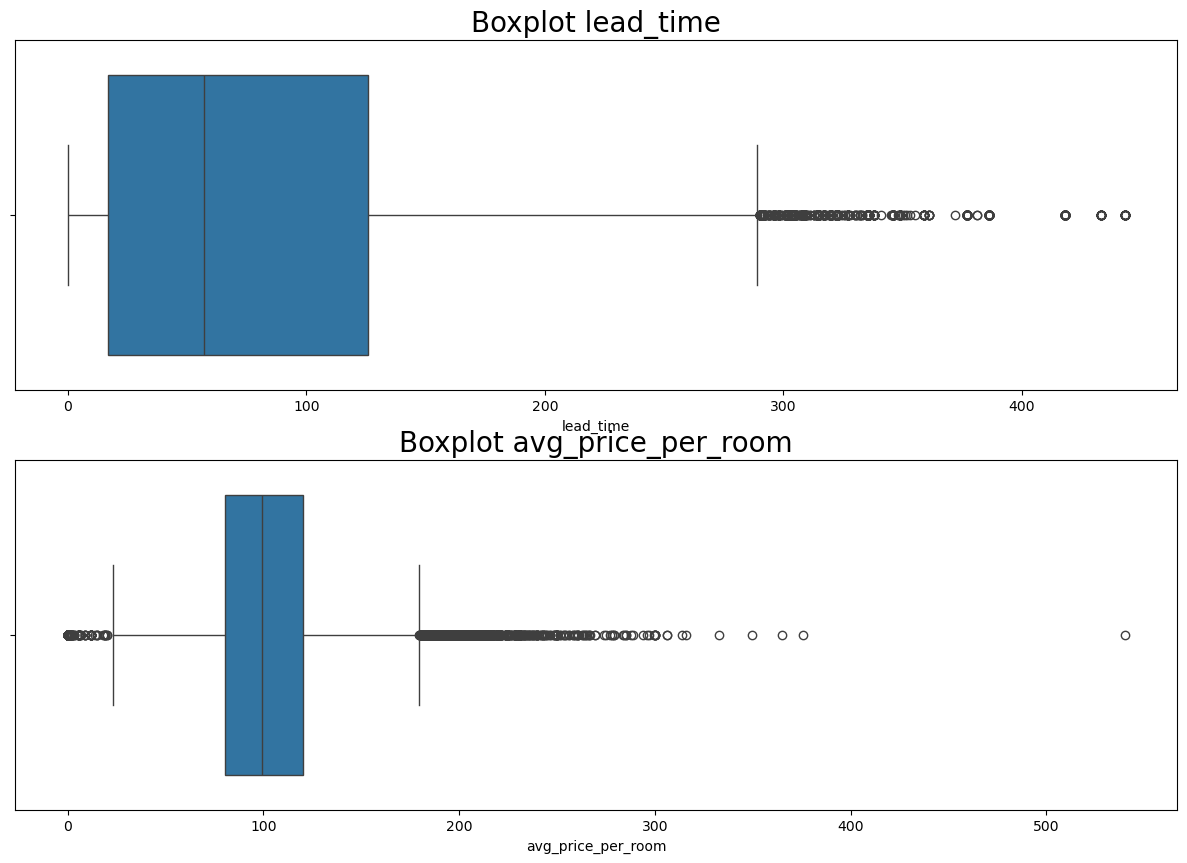

In [121]:
plt.figure(figsize = (15,10))

plt.subplot(2, 1, 1)
plt.title("Boxplot lead_time", fontdict = {'fontsize': 20})
sns.boxplot(x=df["lead_time"])

plt.subplot(2, 1, 2)
plt.title("Boxplot avg_price_per_room", fontdict = {'fontsize': 20})
sns.boxplot(x=df["avg_price_per_room"])


In [58]:

# Correcting the 'lower' lambda function
lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower()) 

# Applying the functions to the DataFrame
# Applying lowercase to all string columns in the DataFrame
for col in df.columns:
    if df[col].dtype == 'object':  # typically string columns are of 'object' type
        df[col] = df[col].map(lower)
        
#df.head() 

#df.info()
#df.isnull().sum()
unique_meal_values = df['type_of_meal_plan'].unique()
unique_room_values = df['room_type_reserved'].unique()
unique_segment_values = df['market_segment_type'].unique()
print(sorted(unique_meal_values))
print(sorted(unique_room_values))
print(unique_segment_values)


['meal plan 1', 'meal plan 2', 'meal plan 3', 'not selected']
['room type 1', 'room type 2', 'room type 3', 'room type 4', 'room type 5', 'room type 6', 'room type 7']
['offline' 'online' 'corporate' 'aviation' 'complementary']


In [59]:

df['type_of_meal_plan'] = df['type_of_meal_plan'].replace({'not selected': 0, 'meal plan 1': 1, 'meal plan 2': 2, 'meal plan 3': 3})
df['room_type_reserved'] = df['room_type_reserved'].replace({'room type 1': 0, 'room type 2': 1, 'room type 3': 2, 'room type 4': 3,
                                                             'room type 5': 4, 'room type 6': 5, 'room type 7': 6})
df['market_segment_type'] = df['market_segment_type'].replace({'offline': 0, 'online': 1, 'corporate': 2, 'aviation': 3, 'complementary': 4})
df['booking_status'] = df['booking_status'].replace({'canceled': 0, 'not canceled': 1})

encoded_unique_meal_values = df['type_of_meal_plan'].unique()
encoded_unique_room_values = df['room_type_reserved'].unique()
encoded_unique_segment_values = df['market_segment_type'].unique()


#print(unique_meal_values)
#print(unique_room_values)
#print(unique_segment_values)

print(encoded_unique_meal_values)
print(encoded_unique_room_values)
print(encoded_unique_segment_values)
print(df['booking_status'].unique())

[1 0 2 3]
[0 3 1 5 4 6 2]
[0 1 2 3 4]
[1 0]


### Type of Meal Plan

    Not Selected = 0
    Meal Plan 1 = 1
    Meal Plan 2 = 2
    Meal Plan 3 = 3

### Room Type

    Room Type 1 = 0
    Room Type 2 = 1
    Room Type 3 = 2
    Room Type 4 = 3
    Room Type 5 = 4
    Room Type 6 = 5
    Room Type 7 = 6

### Market Segment

    offline = 0
    online = 1
    corporate = 2
    avitation = 3
    complementary = 4

<Axes: >

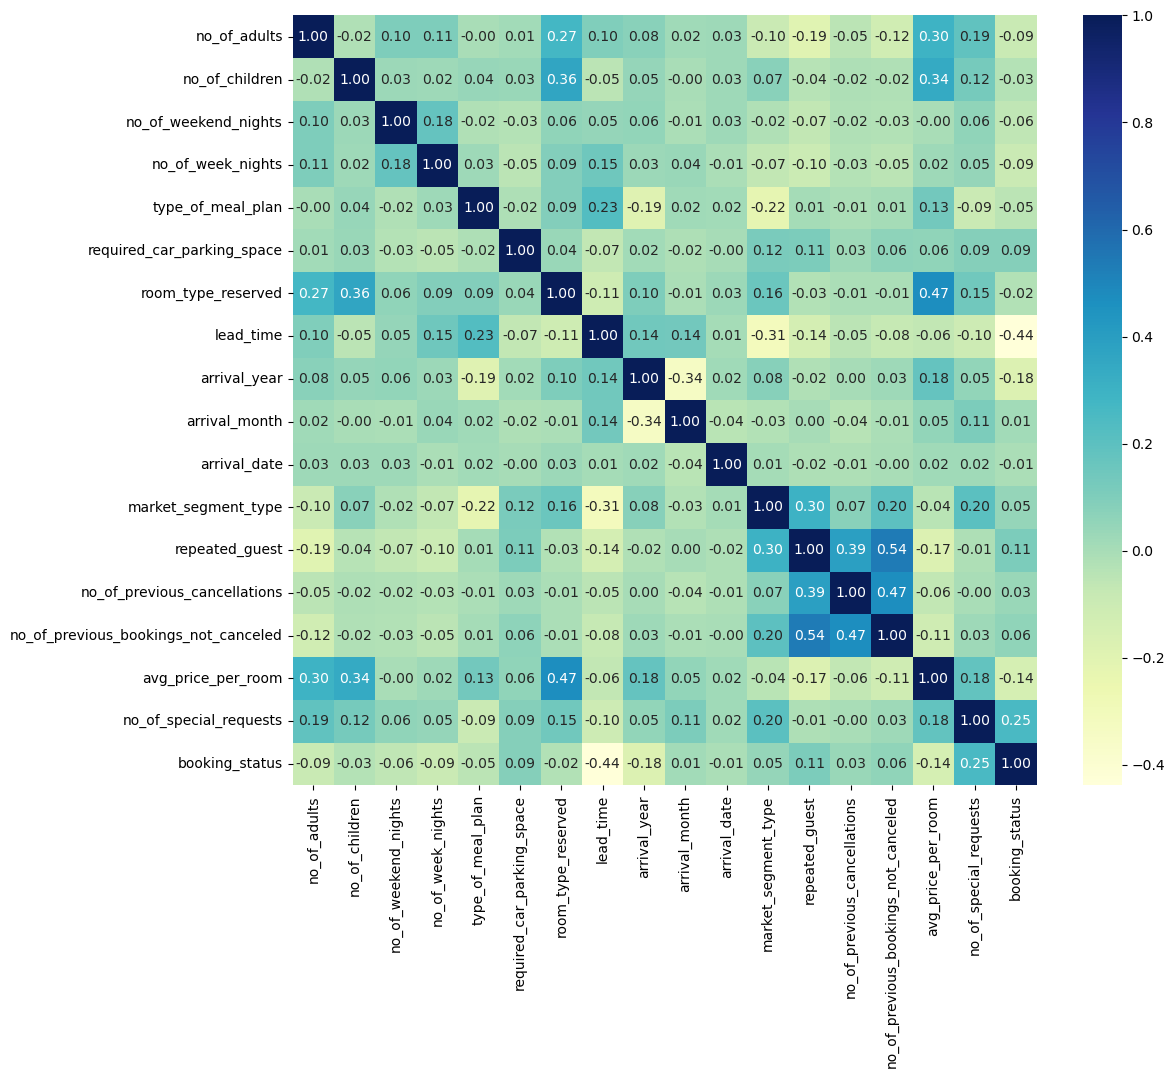

In [60]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

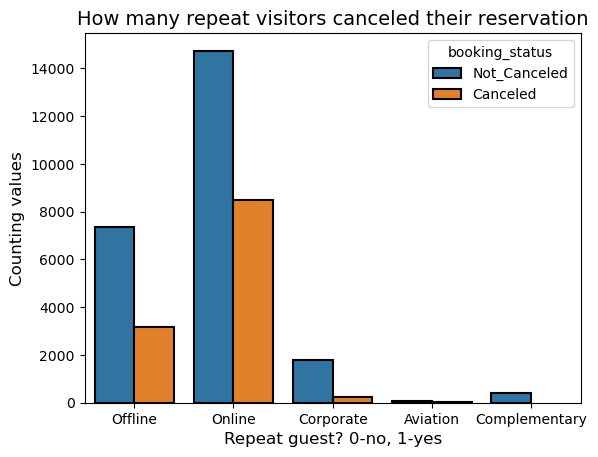

In [85]:
ax = sns.countplot(x="market_segment_type", hue="booking_status" , data=df,palette='tab10', edgecolor='black', linewidth=1.5)

ax.set_xlabel('Repeat guest? 0-no, 1-yes', fontsize=12)
ax.set_ylabel('Counting values', fontsize=12)
ax.set_title('How many repeat visitors canceled their reservation', fontsize=14)


plt.show()

[0 1]


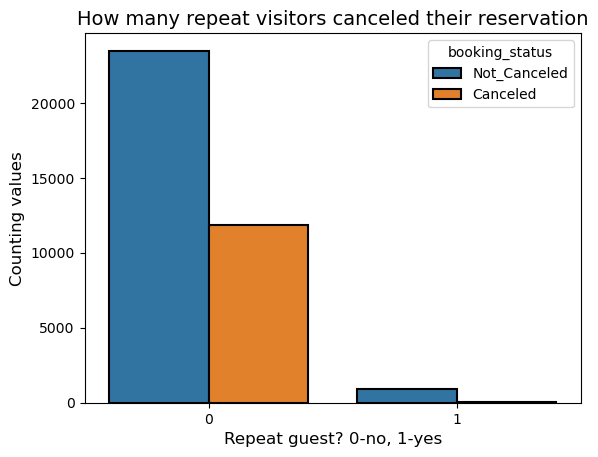

In [86]:
ax = sns.countplot(x="repeated_guest", hue="booking_status" , data=df ,palette='tab10', edgecolor='black', linewidth=1.5)

ax.set_xlabel('Repeat guest? 0-no, 1-yes', fontsize=12)
ax.set_ylabel('Counting values', fontsize=12)
ax.set_title('How many repeat visitors canceled their reservation', fontsize=14)


plt.show()

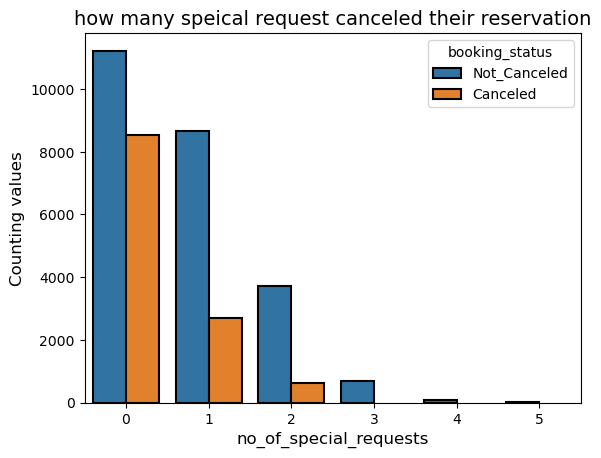

In [83]:
ax = sns.countplot(x="no_of_special_requests", hue="booking_status" , data=df ,palette='tab10', edgecolor='black', linewidth=1.5)

ax.set_xlabel('no_of_special_requests', fontsize=12)
ax.set_ylabel('Counting values', fontsize=12)
ax.set_title('how many speical request canceled their reservation', fontsize=14)


plt.show()

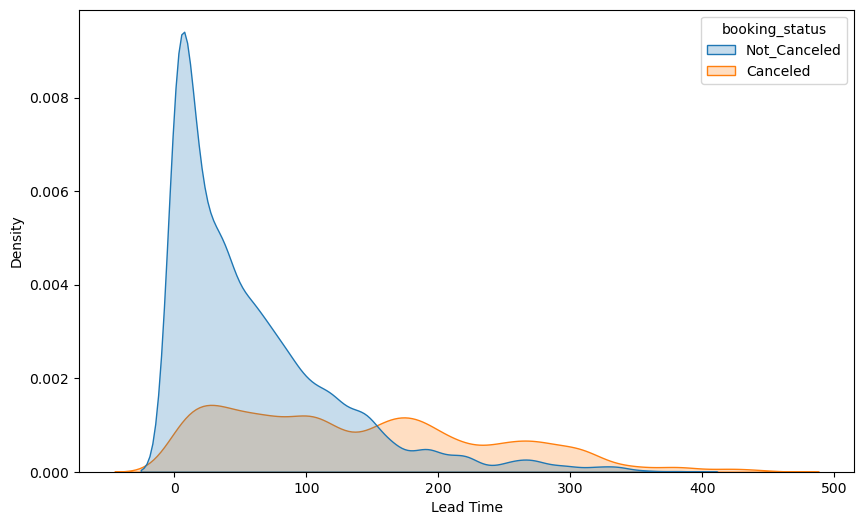

In [81]:
# Set up the plot
plt.figure(figsize=(10, 6))

sns.kdeplot(x='lead_time', hue='booking_status', palette = 'tab10', fill=True, data=df)

# Set the labels and title
plt.xlabel('Lead Time')


# Show the plot
plt.show()

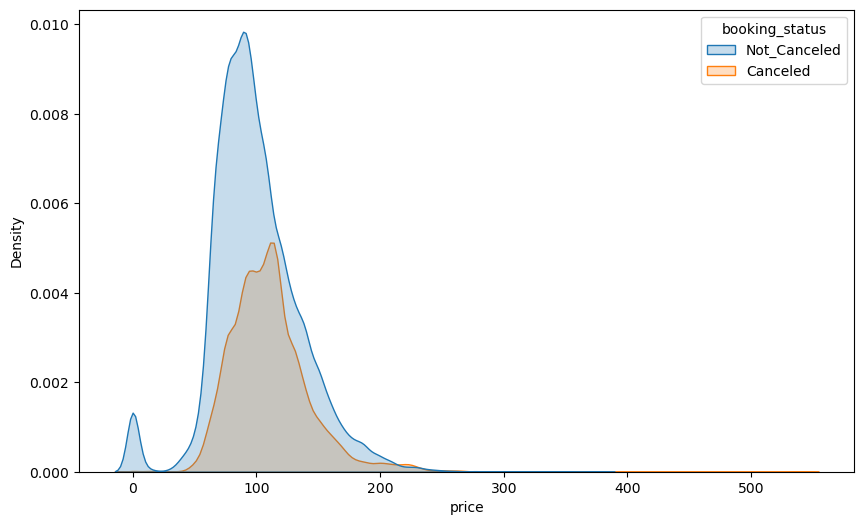

In [69]:
# Set up the plot
plt.figure(figsize=(10, 6))


sns.kdeplot(x='avg_price_per_room', hue='booking_status', palette = 'tab10', fill=True, data=df)

# Set the labels and title
plt.xlabel('price')


# Show the plot
plt.show()

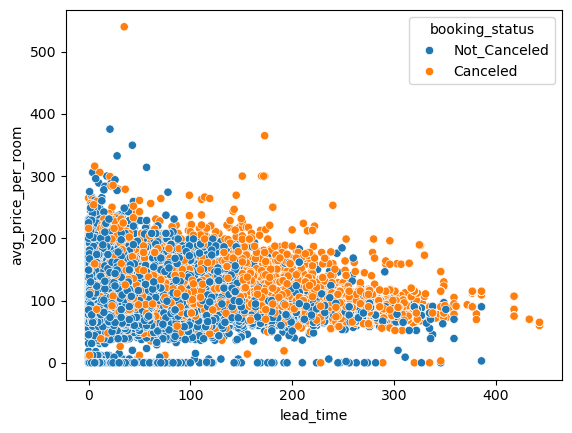

In [78]:
sns.scatterplot(data=df, x="lead_time", y="avg_price_per_room", palette = 'tab10', hue = 'booking_status')
plt.show()

# Split the data for train and test data

In [10]:
X = df[['no_of_adults', 'no_of_children','no_of_weekend_nights','no_of_week_nights', 'type_of_meal_plan', 	
               'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 	
               'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 	
               'avg_price_per_room', 'no_of_special_requests']]

y = df['booking_status']
y.head()

0    not canceled
1    not canceled
2        canceled
3        canceled
4        canceled
Name: booking_status, dtype: object

In [6]:
from sklearn.model_selection import train_test_split

#Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (29020, 17)
Shape of X_test: (7255, 17)
Shape of y_train: (29020,)
Shape of y_test: (7255,)


# Fit your model and predict 

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Train the model
dtc.fit(X_train, y_train)

# Take the model that was trained on the X_train_cv data and apply it to the X_test_cv
y_pred = lr.predict(X_test)

In [59]:
y_pred = clf.predict(X_test)
np.unique(y_pred)

array(['canceled', 'not canceled'], dtype=object)

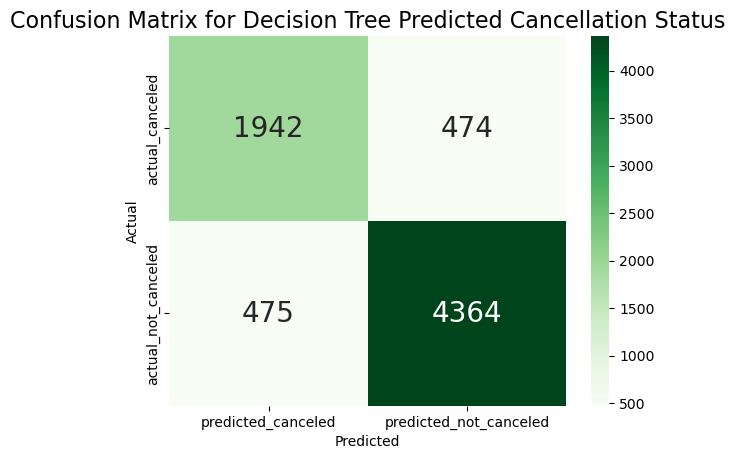

In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

sns.heatmap(cm, xticklabels=['predicted_canceled', 'predicted_not_canceled'], yticklabels=['actual_canceled', 'actual_not_canceled'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="Greens");

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision Tree Predicted Cancellation Status", fontsize=16)

plt.show()

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
#true_neg, false_pos = cm[0]
#false_neg, true_pos = cm[1]

#accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
#precision = round((true_pos) / (true_pos + false_pos),3)
#recall = round((true_pos) / (true_pos + false_neg),3)
#f1 = round(2 * (precision * recall) / (precision + recall),3)

accuracy = round(accuracy_score(y_test, y_pred),3)
precision = round(precision_score(y_test, y_pred, pos_label = 'not canceled'),3)
recall = round(recall_score(y_test, y_pred, pos_label = 'not canceled'),3)
f1 = round(f1_score(y_test, y_pred, pos_label = 'not canceled'),3)


print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

print(classification_report(y_test, y_pred))

Accuracy: 0.869
Precision: 0.902
Recall: 0.902
F1 Score: 0.902
              precision    recall  f1-score   support

    canceled       0.80      0.80      0.80      2416
not canceled       0.90      0.90      0.90      4839

    accuracy                           0.87      7255
   macro avg       0.85      0.85      0.85      7255
weighted avg       0.87      0.87      0.87      7255

